In [364]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib
import warnings
warnings.filterwarnings('ignore')
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)


In [365]:
df1= pd.read_csv("D:\python practice\Machine Learing\ML project\Entities.csv")
df1.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [366]:
df1.isnull().sum()

Unnamed: 0           0
property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Total_Area           0
dtype: int64

In [367]:
df1.describe ()

,Unnamed: 0,property_id,location_id,price,latitude,longitude,baths,bedrooms,Total_Area
count,168446.000000,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,1.684460e+05
mean,84222.500000,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,1.394239e+04
std,48626.316059,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,8.623647e+05
min,0.000000,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000e+00
25%,42111.250000,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,1.905757e+03
50%,84222.500000,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,4.356016e+03
75%,126333.750000,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,1.197904e+04
max,168445.000000,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,3.387988e+08


In [368]:
df1.shape

(168446, 18)

In [369]:
df1.groupby('city')['city'].agg('count')
df1

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,For Sale,6,7/18/2019,Al Shahab Enterprises,Shahmir,26136.096
168442,168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,For Sale,3,7/18/2019,Al Shahab Enterprises,Shahmir,2178.008
168443,168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,For Sale,6,7/18/2019,Al Shahab Enterprises,Shahmir,26136.096
168444,168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,For Sale,3,7/18/2019,Al Shahab Enterprises,Shahmir,21235.578


In [370]:
df1.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [371]:
df1['city'].unique()

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

In [372]:
df1.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [373]:
df2=df1.drop(['property_id','Unnamed: 0',	'location_id','page_url','purpose','province_name','date_added','agency','agent','latitude','longitude'],axis='columns')
df2.head()

,property_type,price,location,city,baths,bedrooms,Total_Area
0,Flat,10000000,G-10,Islamabad,2,2,1089.004
1,Flat,6900000,E-11,Islamabad,3,3,15246.056
2,House,16500000,G-15,Islamabad,6,5,2178.008
3,House,43500000,Bani Gala,Islamabad,4,4,10890.000
4,House,7000000,DHA Defence,Islamabad,3,3,2178.008


In [374]:
df2.isna().sum()

property_type    0
price            0
location         0
city             0
baths            0
bedrooms         0
Total_Area       0
dtype: int64

In [375]:
df2.Total_Area.unique()

array([1.0890040e+03, 1.5246056e+04, 2.1780080e+03, 1.0890000e+04,
       8.7120000e+04, 5.4450000e+03, 1.6879562e+04, 1.9329821e+04,
       2.1235578e+04, 2.4502500e+05, 2.7225100e+03, 8.4397810e+03,
       4.0837650e+03, 3.8115140e+03, 1.3612550e+03, 3.2670000e+04,
       2.2869084e+04, 1.2795797e+04, 3.2670120e+03, 1.1706793e+04,
       4.8460678e+04, 1.8240817e+04, 1.4429303e+04, 1.1434500e+05,
       1.3612500e+05, 6.5340000e+04, 3.6209383e+04, 1.3068000e+05,
       4.3560160e+03, 2.5319343e+04, 2.4502590e+03, 2.9947610e+03,
       2.0418825e+04, 4.9005180e+03, 8.1675300e+02, 3.5392500e+05,
       6.8062750e+03, 4.3560000e+04, 5.9895000e+04, 1.6335060e+03,
       2.5591500e+05, 2.6408347e+04, 1.9057570e+03, 1.0345538e+04,
       1.4973805e+04, 8.1675000e+04, 6.5340240e+03, 1.1979044e+04,
       5.9895220e+03, 2.1780000e+04, 2.4230339e+04, 8.7120320e+03,
       2.6136096e+04, 2.6680598e+04, 2.7769602e+04, 3.1036614e+04,
       3.5664881e+04, 1.3068048e+04, 2.0691076e+04, 1.4701554e

In [376]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [377]:
import re
import math

def convert_sqft_to_num(x):
    """Convert various Total_Area formats to a single float (sqft).
    Handles:
      - numeric types (int/float)
      - strings like '2100 - 8501' (average)
      - strings with commas or units (e.g. '1,089 sqft')
      - returns None for missing/unparseable values
    """
    if x is None:
        return None
    if isinstance(x, (int, float)):
        if isinstance(x, float) and math.isnan(x):
            return None
        return float(x)
    s = str(x).strip().lower()
    if s == '':
        return None
    s = s.replace(',', '')
    s = s.replace('sqft', '').replace('sq. ft', '').replace('square feet', '')
    nums = re.findall(r'\d+\.?\d*', s)
    if not nums:
        return None
    nums = [float(n) for n in nums]
    if len(nums) == 1:
        return nums[0]
    return sum(nums) / len(nums)

# quick tests
print(convert_sqft_to_num('2100 - 8501'))  # ~5300.5 (average)
print(convert_sqft_to_num('2100'))
print(convert_sqft_to_num(1089.004))
print(convert_sqft_to_num(float('nan')))

5300.5
2100.0
1089.004
None


In [378]:
# create a working copy
df3 = df2.copy()
print('Before conversion - nulls in Total_Area:', df3['Total_Area'].isna().sum())
# apply conversion safely
df3['Total_Area'] = df3['Total_Area'].apply(convert_sqft_to_num)
print('After conversion - nulls in Total_Area:', df3['Total_Area'].isna().sum())
# quick summary
df3['Total_Area'].describe()

Before conversion - nulls in Total_Area: 0
After conversion - nulls in Total_Area: 0
After conversion - nulls in Total_Area: 0


count    1.684460e+05
mean     1.394239e+04
std      8.623647e+05
min      0.000000e+00
25%      1.905757e+03
50%      4.356016e+03
75%      1.197904e+04
max      3.387988e+08
Name: Total_Area, dtype: float64

In [379]:
df3.head()

,property_type,price,location,city,baths,bedrooms,Total_Area
0,Flat,10000000,G-10,Islamabad,2,2,1089.004
1,Flat,6900000,E-11,Islamabad,3,3,15246.056
2,House,16500000,G-15,Islamabad,6,5,2178.008
3,House,43500000,Bani Gala,Islamabad,4,4,10890.000
4,House,7000000,DHA Defence,Islamabad,3,3,2178.008


Feaure Engineering

In [380]:
df4=df3.copy()
df4['price_per_sqaureft']=df4['price']*100000/df4['Total_Area']
df4.head()

,property_type,price,location,city,baths,bedrooms,Total_Area,price_per_sqaureft
0,Flat,10000000,G-10,Islamabad,2,2,1089.004,9.182703e+08
1,Flat,6900000,E-11,Islamabad,3,3,15246.056,4.525761e+07
2,House,16500000,G-15,Islamabad,6,5,2178.008,7.575730e+08
3,House,43500000,Bani Gala,Islamabad,4,4,10890.000,3.994490e+08
4,House,7000000,DHA Defence,Islamabad,3,3,2178.008,3.213946e+08


In [381]:
df4.location.unique()

array(['G-10', 'E-11', 'G-15', ..., 'Samanzar Colony', 'Shahra-e-Liaquat',
       'Sundar'], dtype=object)

In [382]:
len(df4.location.unique())

1509

In [383]:
df4.location=df4.location.apply(lambda x: x.strip())
 
location_state=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_state

location
DHA Defence                   22046
Bahria Town Karachi            8548
Bahria Town Rawalpindi         8502
Bahria Town                    6429
Gulistan-e-Jauhar              5877
                              ...  
Saadi Park                        1
Saadat Avenue                     1
Ryaz ul Jannah                    1
Gulshan-E-Faisal                  1
Green Hills Housing Scheme        1
Name: location, Length: 1509, dtype: int64

In [384]:
len(location_state[location_state<=10])

825

In [385]:
Location_state_less_than_10=location_state[location_state<=10]
Location_state_less_than_10

location
Race Course                     10
Nishtar Road (Lawrence Road)    10
Misri Shah                      10
Pakki Thatti                    10
Mall Road                       10
                                ..
Saadi Park                       1
Saadat Avenue                    1
Ryaz ul Jannah                   1
Gulshan-E-Faisal                 1
Green Hills Housing Scheme       1
Name: location, Length: 825, dtype: int64

In [386]:
len(df4.location.unique())

1509

In [387]:
df4.location=df4.location.apply(lambda x: 'other' if x in Location_state_less_than_10 else x)
len(df4.location.unique())
df4.head(10)

,property_type,price,location,city,baths,bedrooms,Total_Area,price_per_sqaureft
0,Flat,10000000,G-10,Islamabad,2,2,1089.004,9.182703e+08
1,Flat,6900000,E-11,Islamabad,3,3,15246.056,4.525761e+07
2,House,16500000,G-15,Islamabad,6,5,2178.008,7.575730e+08
3,House,43500000,Bani Gala,Islamabad,4,4,10890.000,3.994490e+08
4,House,7000000,DHA Defence,Islamabad,3,3,2178.008,3.213946e+08
5,House,34500000,Ghauri Town,Islamabad,8,8,87120.000,3.960055e+07
6,House,27000000,Korang Town,Islamabad,8,8,5445.000,4.958678e+08
7,Flat,7800000,E-11,Islamabad,2,2,16879.562,4.620973e+07
8,House,50000000,DHA Defence,Islamabad,7,7,5445.000,9.182736e+08
9,Penthouse,40000000,F-11,Islamabad,5,5,5445.000,7.346189e+08


In [388]:
df4.head(10)

,property_type,price,location,city,baths,bedrooms,Total_Area,price_per_sqaureft
0,Flat,10000000,G-10,Islamabad,2,2,1089.004,9.182703e+08
1,Flat,6900000,E-11,Islamabad,3,3,15246.056,4.525761e+07
2,House,16500000,G-15,Islamabad,6,5,2178.008,7.575730e+08
3,House,43500000,Bani Gala,Islamabad,4,4,10890.000,3.994490e+08
4,House,7000000,DHA Defence,Islamabad,3,3,2178.008,3.213946e+08
5,House,34500000,Ghauri Town,Islamabad,8,8,87120.000,3.960055e+07
6,House,27000000,Korang Town,Islamabad,8,8,5445.000,4.958678e+08
7,Flat,7800000,E-11,Islamabad,2,2,16879.562,4.620973e+07
8,House,50000000,DHA Defence,Islamabad,7,7,5445.000,9.182736e+08
9,Penthouse,40000000,F-11,Islamabad,5,5,5445.000,7.346189e+08


Outlier Detection And Outlier Remova

In [389]:
df4[df4.Total_Area/df4.bedrooms<300].head()

,property_type,price,location,city,baths,bedrooms,Total_Area,price_per_sqaureft
25,House,6800000,Koral Town,Islamabad,4,4,1089.004,6.244238e+08
68,House,3200000,Chungi Amar Sadhu,Lahore,2,3,816.753,3.917953e+08
118,House,5000000,Chakri Road,Rawalpindi,5,6,1361.255,3.673081e+08
161,House,32000000,DHA Defence,Karachi,4,4,1089.004,2.938465e+09
268,House,60000,Askari 13,Rawalpindi,0,5,1361.255,4.407697e+06


In [390]:
df5=df4[~(df4.Total_Area/df4.bedrooms<300)]
df5.head()
df5.shape

(159304, 8)

In [391]:
df5.price_per_sqaureft.describe()

count    1.593040e+05
mean              inf
std               NaN
min      0.000000e+00
25%      2.754821e+06
50%      1.001753e+08
75%      7.040072e+08
max               inf
Name: price_per_sqaureft, dtype: float64

In [392]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqaureft)
        st=np.std(subdf.price_per_sqaureft)
        reduced_df=subdf[(subdf.price_per_sqaureft>(m-st)) & (subdf.price_per_sqaureft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6=remove_pps_outliers(df5)
df6.shape

(120834, 8)

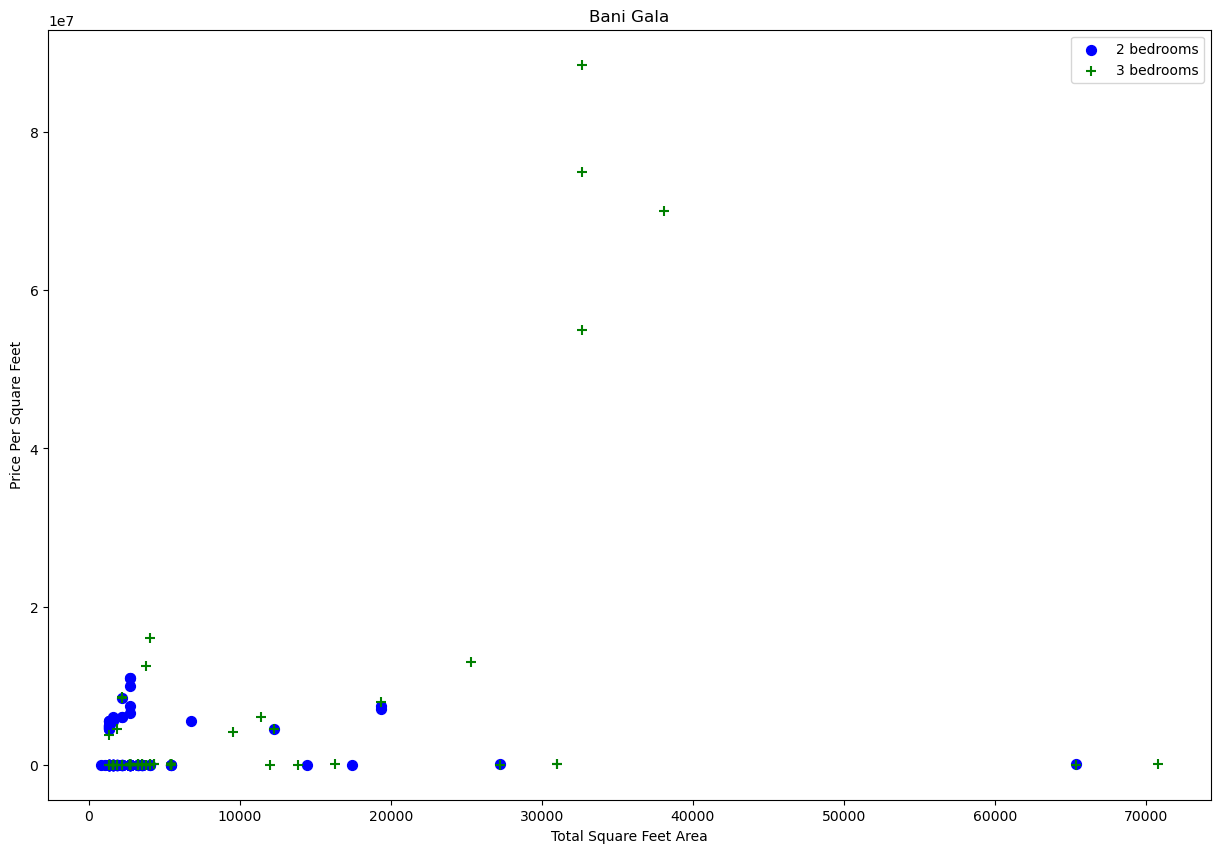

In [393]:
def plot_scatter_chart(df,location):
    bedrooms2=df[(df.location==location) & (df.bedrooms==2)]
    bedrooms3=df[(df.location==location) & (df.bedrooms==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bedrooms2.Total_Area,bedrooms2.price,color='blue',label='2 bedrooms',s=50)
    plt.scatter(bedrooms3.Total_Area,bedrooms3.price,marker='+',color='green',label='3 bedrooms',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df6,"Bani Gala")
plt.show()

Now we can remove those 2 BHK apartments whose price_per_spft is less than mean price_per_sqft of 1BHK Apartment  (BHK means Bedrooms)

In [394]:
def remove_bedrooms_outliers(df):
    exclude_indices = np.array([])

    for location, location_df in df.groupby('location'):
        bedrooms_stats = {}
        
        # Compute mean, std, and count for each bedroom group
        for bedrooms, bedrooms_df in location_df.groupby('bedrooms'):
            bedrooms_stats[bedrooms] = {
                'mean': np.mean(bedrooms_df.price_per_sqaureft),
                'std': np.std(bedrooms_df.price_per_sqaureft),
                'count': bedrooms_df.shape[0]
            }
        
        # Compare each BHK group with one less bedroom
        for bedrooms, bedrooms_df in location_df.groupby('bedrooms'):
            stats = bedrooms_stats.get(bedrooms - 1)
            if stats and stats['count'] > 5:
                # Remove outliers with price lower than the previous bedroom mean
                exclude_indices = np.append(
                    exclude_indices,
                    bedrooms_df[bedrooms_df.price_per_sqaureft < stats['mean']].index.values
                )

    return df.drop(exclude_indices, axis='index')


In [395]:
df7=remove_bedrooms_outliers(df6)
df7.shape  

(67301, 8)

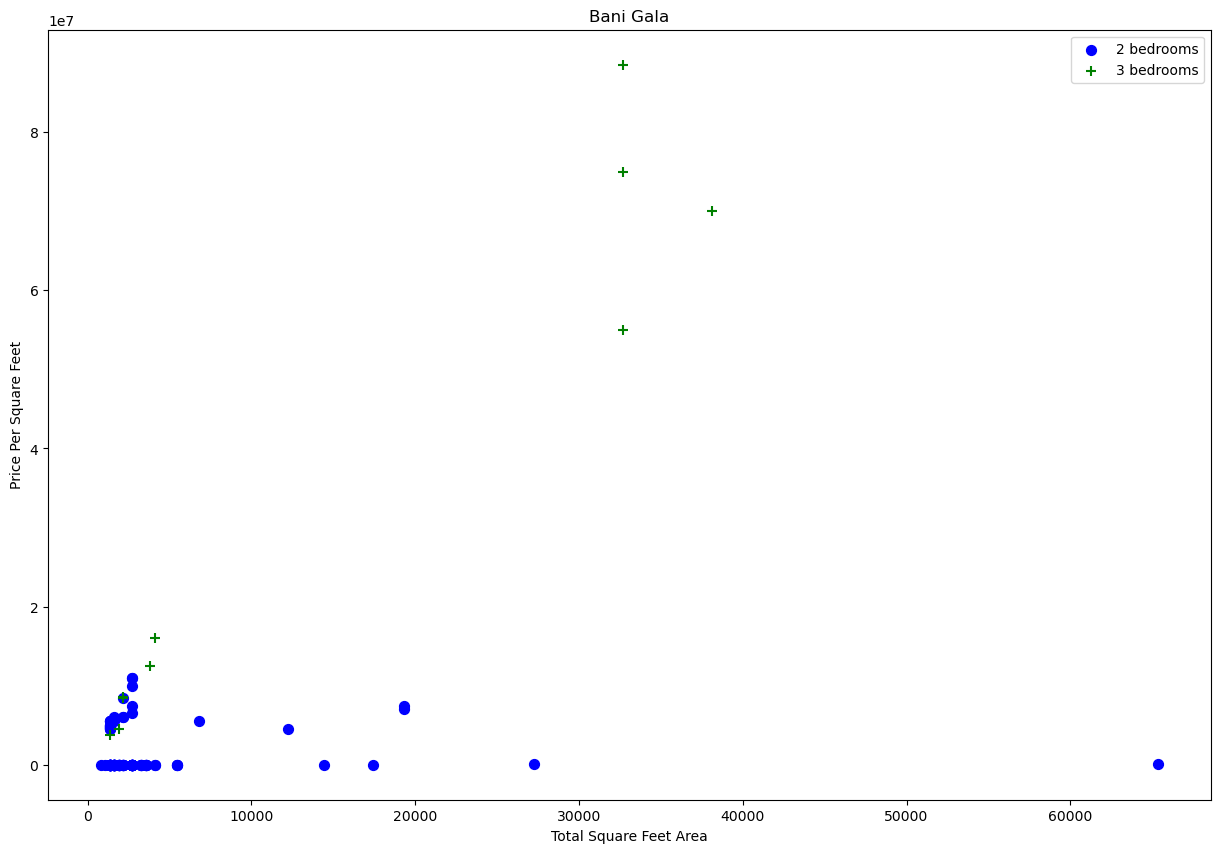

In [396]:
plot_scatter_chart(df7,"Bani Gala")

Text(0, 0.5, 'Count')

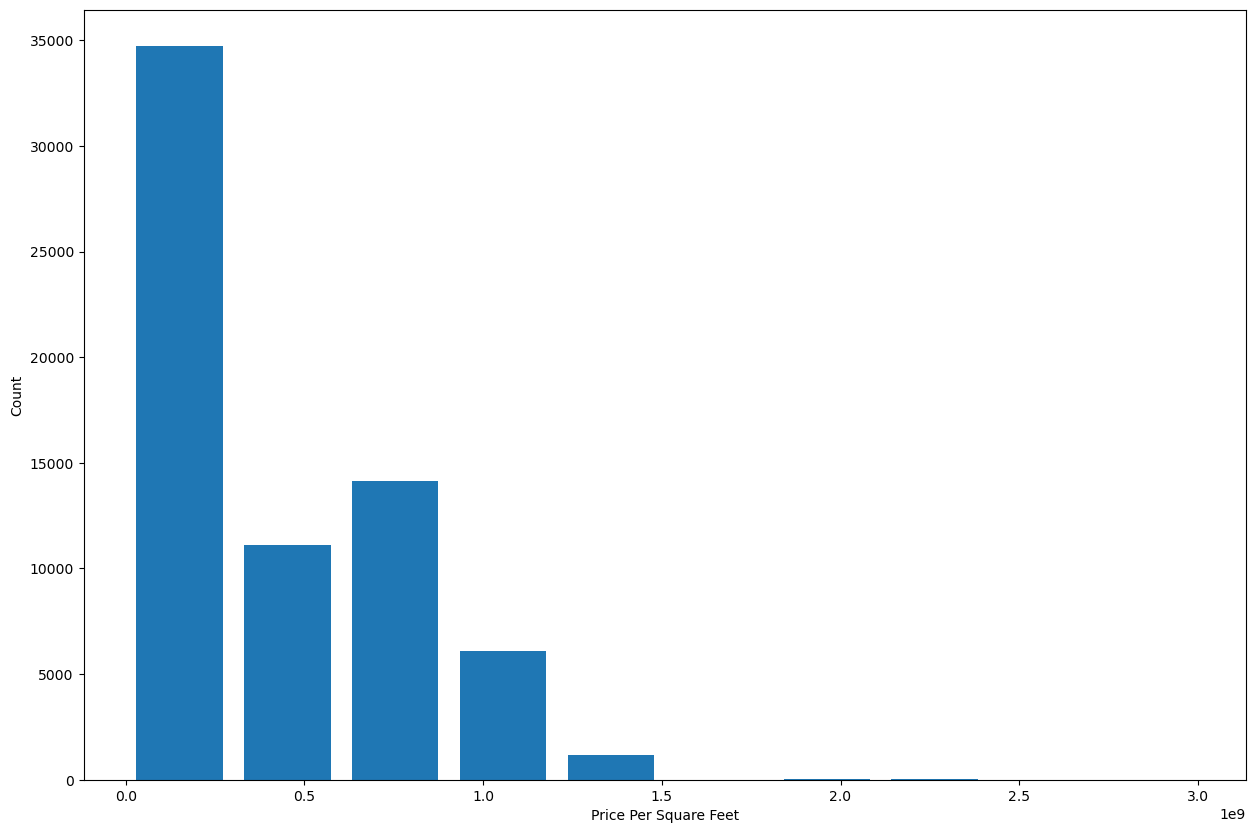

In [397]:
plt.hist(df7.price_per_sqaureft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [398]:
df7.baths.unique()

array([ 2,  8,  1,  0,  3,  6,  5,  7, 10,  4,  9, 13, 12, 11, 14],
      dtype=int64)

In [399]:
df7[df7.baths>10]
df7.shape

(67301, 8)

Text(0, 0.5, 'Count')

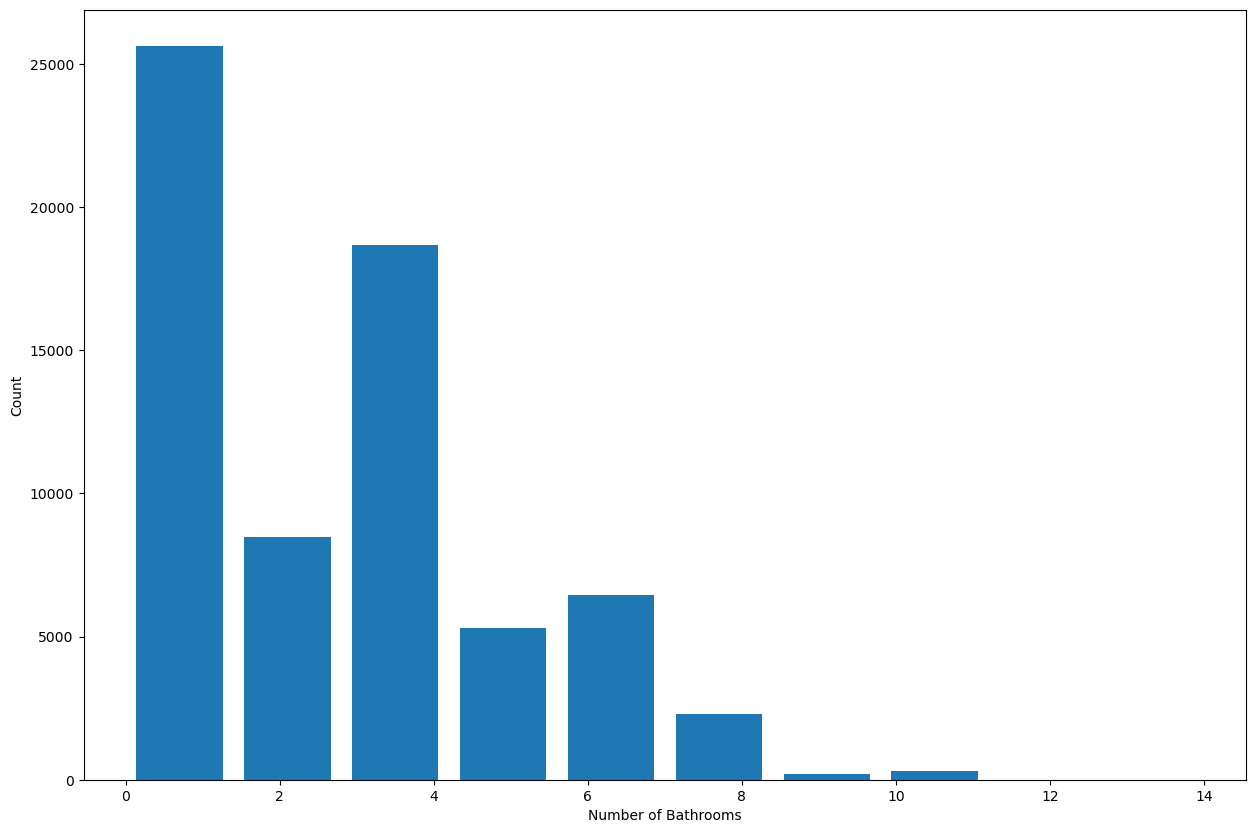

In [400]:
plt.hist(df7.baths,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [401]:
df8=df7[df7.baths<df7.bedrooms+2]
df8.head()
df8.shape

(65503, 8)

In [402]:
df9=df8.drop(['price_per_sqaureft'],axis='columns')
df9.head()

,property_type,price,location,city,baths,bedrooms,Total_Area
2,House,1000000,7th Avenue,Islamabad,8,8,10890.000
4,Room,17000,7th Avenue,Islamabad,1,2,1361.255
5,House,190000,7th Avenue,Islamabad,0,0,1361.255
6,Room,16000,7th Avenue,Islamabad,0,2,1361.255
7,Upper Portion,20000,7th Avenue,Islamabad,2,2,1361.255


Model Building

In [403]:
# create dummies for categorical columns: location, property_type, city
Dummies = pd.get_dummies(df9[['location','property_type','city']], dtype=int)
print('Dummies shape:', Dummies.shape)
Dummies.head()

Dummies shape: (65503, 695)


,location_7th Avenue,location_9th Avenue,location_ASF Tower,location_AWT Army Welfare Trust,location_Aashiana Road,location_Abdali Road,location_Abdalians Cooperative Housing Society,location_Abid Town,location_Abul Hassan Isphani Road,location_Acro Green - Bankers Avenue,...,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [404]:
# concat original df9 with dummies; drop any dummy column named 'other' or ending with '_other' to avoid multicollinearity
drop_cols = [c for c in Dummies.columns if c== 'other' or c.endswith('_other')]
print('Dropping columns:', drop_cols)
df10 = pd.concat([df9, Dummies.drop(columns=drop_cols, errors='ignore')], axis=1)
df10.head()

Dropping columns: ['location_other']


,property_type,price,location,city,baths,bedrooms,Total_Area,location_7th Avenue,location_9th Avenue,location_ASF Tower,...,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi
2,House,1000000,7th Avenue,Islamabad,8,8,10890.000,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,Room,17000,7th Avenue,Islamabad,1,2,1361.255,1,0,0,...,0,0,0,1,0,0,1,0,0,0
5,House,190000,7th Avenue,Islamabad,0,0,1361.255,1,0,0,...,1,0,0,0,0,0,1,0,0,0
6,Room,16000,7th Avenue,Islamabad,0,2,1361.255,1,0,0,...,0,0,0,1,0,0,1,0,0,0
7,Upper Portion,20000,7th Avenue,Islamabad,2,2,1361.255,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [405]:
df10.head()

,property_type,price,location,city,baths,bedrooms,Total_Area,location_7th Avenue,location_9th Avenue,location_ASF Tower,...,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi
2,House,1000000,7th Avenue,Islamabad,8,8,10890.000,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,Room,17000,7th Avenue,Islamabad,1,2,1361.255,1,0,0,...,0,0,0,1,0,0,1,0,0,0
5,House,190000,7th Avenue,Islamabad,0,0,1361.255,1,0,0,...,1,0,0,0,0,0,1,0,0,0
6,Room,16000,7th Avenue,Islamabad,0,2,1361.255,1,0,0,...,0,0,0,1,0,0,1,0,0,0
7,Upper Portion,20000,7th Avenue,Islamabad,2,2,1361.255,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [406]:
df11=df10.drop(['location','property_type','city'],axis='columns')
df11.head()
df11.shape

(65503, 698)

In [407]:
X= df11.drop('price',axis='columns')
X.head()

,baths,bedrooms,Total_Area,location_7th Avenue,location_9th Avenue,location_ASF Tower,location_AWT Army Welfare Trust,location_Aashiana Road,location_Abdali Road,location_Abdalians Cooperative Housing Society,...,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,city_Faisalabad,city_Islamabad,city_Karachi,city_Lahore,city_Rawalpindi
2,8,8,10890.000,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,1,2,1361.255,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
5,0,0,1361.255,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6,0,2,1361.255,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7,2,2,1361.255,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [408]:
y=df11.price    
y.head()

2    1000000
4      17000
5     190000
6      16000
7      20000
Name: price, dtype: int64

In [409]:
# 1) Ensure we have df11 (feature table without categorical originals) or build from df10/df9
if 'df11' in globals():
    df_feat = df11.copy()
else:
    # try to reconstruct df11 from df10 or df9 if available
    if 'df10' in globals():
        df_feat = df10.copy()
        if 'price' in df_feat.columns:
            df_feat = df_feat.drop(columns=[c for c in ['location','property_type','city'] if c in df_feat.columns], errors='ignore')
        else:
            raise RuntimeError('Cannot find price column in df10 to construct df11')
    else:
        raise RuntimeError('df11 (or df10) not found. Please run preprocessing cells first.')

print('Initial feature table shape:', df_feat.shape)


Initial feature table shape: (65503, 698)


In [410]:
# 2) Basic cleaning: remove rows with missing or zero price/Total_Area
for col in ['price','Total_Area']:
    if col not in df_feat.columns:
        raise RuntimeError(f"Required column '{col}' missing from features")

df_feat = df_feat[df_feat['price'].notna()]
df_feat = df_feat[df_feat['Total_Area'].notna()]
# drop rows with non-positive values
df_feat = df_feat[(df_feat['price'] > 0) & (df_feat['Total_Area'] > 0)]

In [411]:
# 3) Create high-impact features
# price_per_sqft if not present
if 'price_per_sqaureft' not in df_feat.columns and 'price_per_sqaureft' in globals():
    df_feat['price_per_sqaureft'] = df_feat['price'] * 100000.0 / df_feat['Total_Area']
elif 'price_per_sqaureft' not in df_feat.columns:
    # compute consistently (some earlier cell used price_per_sqaureft with a typo); create a normalized one
    df_feat['price_per_sqft'] = df_feat['price'] * 100000.0 / df_feat['Total_Area']
    # standardize name
    df_feat.rename(columns={'price_per_sqft': 'price_per_sqaureft'}, inplace=True)

# area per bedroom
if 'area_per_bedroom' not in df_feat.columns:
    df_feat['area_per_bedroom'] = df_feat['Total_Area'] / df_feat['bedrooms'].replace(0, np.nan)
    df_feat['area_per_bedroom'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df_feat['area_per_bedroom'].fillna(df_feat['area_per_bedroom'].median(), inplace=True)

# frequency encoding for location if location present (df9 has it)
if 'location' in globals().get('df9', pd.DataFrame()).columns:
    loc_counts = df9['location'].value_counts().to_dict()
    # if df_feat has same index alignment as df9
    try:
        df_feat['location_freq'] = df9.loc[df_feat.index, 'location'].map(loc_counts).fillna(0).astype(int)
    except Exception:
        # fallback: compute from df_feat if it contains location
        if 'location' in df_feat.columns:
            df_feat['location_freq'] = df_feat['location'].map(df_feat['location'].value_counts()).fillna(0).astype(int)
else:
    if 'location' in df_feat.columns:
        df_feat['location_freq'] = df_feat['location'].map(df_feat['location'].value_counts()).fillna(0).astype(int)


In [412]:
# 4) Outlier removal: use price_per_sqaureft IQR and top/bottom percentiles
if 'price_per_sqaureft' in df_feat.columns:
    col = 'price_per_sqaureft'
    q1 = df_feat[col].quantile(0.01)
    q99 = df_feat[col].quantile(0.99)
    # clip extreme 1% both sides
    df_feat = df_feat[(df_feat[col] >= q1) & (df_feat[col] <= q99)]

# Also remove extreme prices (0.5th to 99.5th percentile)
p_lo, p_hi = df_feat['price'].quantile(0.005), df_feat['price'].quantile(0.995)
df_feat = df_feat[(df_feat['price'] >= p_lo) & (df_feat['price'] <= p_hi)]

print('After cleaning/outlier removal shape:', df_feat.shape)

After cleaning/outlier removal shape: (63600, 701)


In [413]:
# 5) Prepare X and y
X = df_feat.drop(columns=['price'])
y = df_feat['price']

# Convert any remaining non-numeric columns to dummies if small cardinality; else drop
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
for c in non_numeric:
    if X[c].nunique() <= 10:
        d = pd.get_dummies(X[c], prefix=c, drop_first=True)
        X = pd.concat([X.drop(columns=[c]), d], axis=1)
    else:
        # drop very high-cardinality text columns
        X = X.drop(columns=[c])

# Fill numeric NaNs with medians
X = X.apply(lambda col: col.fillna(col.median()) if col.dtype.kind in 'biufc' else col)

print('Final X shape / y shape:', X.shape, y.shape)


Final X shape / y shape: (63600, 700) (63600,)


In [414]:
# 6) Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [415]:
# 7) Define models and hyperparameter grids (linear models will use log-target transform)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

models = {
    'LinearRegression': {
        'est': TransformedTargetRegressor(regressor=Pipeline([('sc', StandardScaler()), ('lr', LinearRegression())]), func=np.log1p, inverse_func=np.expm1),
        'params': {}
    },
    'Ridge': {
        'est': TransformedTargetRegressor(regressor=Pipeline([('sc', StandardScaler()), ('ridge', Ridge(max_iter=5000))]), func=np.log1p, inverse_func=np.expm1),
        'params': {'regressor__ridge__alpha': [0.1, 1.0, 10.0, 100.0]}
    },
    'Lasso': {
        'est': TransformedTargetRegressor(regressor=Pipeline([('sc', StandardScaler()), ('lasso', Lasso(max_iter=50000, tol=1e-4))]), func=np.log1p, inverse_func=np.expm1),
        'params': {'regressor__lasso__alpha': [0.01, 0.1, 1.0, 10.0], 'regressor__lasso__selection': ['cyclic', 'random']}
    },
    'DecisionTree': {
        'est': Pipeline([('sc', StandardScaler()), ('dt', DecisionTreeRegressor(random_state=0))]),
        'params': {'dt__criterion': ['squared_error', 'friedman_mse'], 'dt__max_depth': [5, 10, 20, None], 'dt__min_samples_leaf': [1, 5, 10]}
    }
}

In [416]:
# 8) Run GridSearch for each model and collect results
results = []
best_estimators = {}
for name, cfg in models.items():
    print(f"\nRunning GridSearch for {name}")
    gs = GridSearchCV(cfg['est'], cfg['params'], cv=cv, scoring='r2', n_jobs=-1, verbose=1)
    gs.fit(X_train, y_train)
    print(f"Best CV R2 for {name}: {gs.best_score_:.4f}")
    results.append({'model': name, 'best_score': gs.best_score_, 'best_params': gs.best_params_})
    best_estimators[name] = gs.best_estimator_

results_df = pd.DataFrame(results)
print('\nGridSearch summary:')
print(results_df)



Running GridSearch for LinearRegression
Fitting 5 folds for each of 1 candidates, totalling 5 fits


Best CV R2 for LinearRegression: nan

Running GridSearch for Ridge
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best CV R2 for Ridge: -3052996617052752780872148642030333868509610525437210370082834605803084498447327478393238992991063896106764913233339437035954512195598885585260693759418356365596048235865346051966104500929822720.0000

Running GridSearch for Lasso
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best CV R2 for Ridge: -3052996617052752780872148642030333868509610525437210370082834605803084498447327478393238992991063896106764913233339437035954512195598885585260693759418356365596048235865346051966104500929822720.0000

Running GridSearch for Lasso
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best CV R2 for Lasso: -0.2128

Running GridSearch for DecisionTree
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best CV R2 for Lasso: -0.2128

Running GridSearch for DecisionTree
Fitting 5 folds for each of 24 candidates, totalling 

In [417]:
# 9) Evaluate best model (select by best_score)
best_row = results_df.loc[results_df['best_score'].idxmax()]
best_name = best_row['model']
best_model = best_estimators[best_name]
print(f"\nSelected best model: {best_name}")

# Fit best_model on full train set (already fitted by GridSearch on X_train via gs.fit; to be safe, fit again on X_train)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(f"\nTest metrics for {best_name} -> R2: {r2_score(y_test, y_pred):.4f}, MAE: {mean_absolute_error(y_test, y_pred):.2f}, RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")



Selected best model: DecisionTree

Test metrics for DecisionTree -> R2: 0.9939, MAE: 184503.66, RMSE: 1681801.14

Test metrics for DecisionTree -> R2: 0.9939, MAE: 184503.66, RMSE: 1681801.14


In [418]:
# 10) If linear model, extract coefficients mapped to feature names
try:
    if hasattr(best_model, 'regressor') and hasattr(best_model.regressor, 'named_steps'):
        inner = best_model.regressor
    elif isinstance(best_model, Pipeline):
        inner = best_model
    else:
        inner = best_model

    # find linear estimator in pipeline
    coef = None
    if isinstance(inner, TransformedTargetRegressor):
        inner = inner.regressor
    if isinstance(inner, Pipeline):
        for step_name, step in inner.steps:
            if hasattr(step, 'coef_'):
                coef = step.coef_
                break
    elif hasattr(inner, 'coef_'):
        coef = inner.coef_

    if coef is not None:
        feat_names = X.columns.tolist()
        coef = np.array(coef).ravel()
        coef_df = pd.DataFrame({'feature': feat_names, 'coef': coef})
        coef_df['abs'] = coef_df['coef'].abs()
        coef_df = coef_df.sort_values('abs', ascending=False).drop(columns=['abs'])
        print('\nTop coefficients (linear model):')
        print(coef_df.head(20))
    else:
        print('\nBest model does not expose linear coefficients (likely tree-based).')
except Exception as e:
    print('Could not extract coefficients:', e)



Best model does not expose linear coefficients (likely tree-based).


In [419]:
# 11) If DecisionTree, show top feature importances
try:
    if best_name.lower().startswith('decision'):
        # try to extract feature_importances_
        estimator = best_model
        if isinstance(estimator, Pipeline):
            # last step
            estimator = estimator.steps[-1][1]
        if hasattr(estimator, 'feature_importances_'):
            imps = estimator.feature_importances_
            idx = np.argsort(imps)[::-1][:20]
            print('\nTop DecisionTree feature importances:')
            for i in idx:
                if imps[i] > 0:
                    print(f"{X.columns[i]}: {imps[i]:.4f}")
except Exception as e:
    print('Could not extract feature importances:', e)



Top DecisionTree feature importances:
Total_Area: 0.3713
price_per_sqaureft: 0.3276
bedrooms: 0.2744
location_DHA Defence: 0.0247
area_per_bedroom: 0.0009
location_freq: 0.0003
location_Civil Lines: 0.0002
city_Lahore: 0.0001
baths: 0.0001
city_Rawalpindi: 0.0001
location_F-10: 0.0001
city_Islamabad: 0.0000
location_Azam Gardens: 0.0000
property_type_House: 0.0000
city_Karachi: 0.0000
location_Jamshed Town: 0.0000
location_Chak Shahzad: 0.0000
location_Clifton: 0.0000
location_Muslim Town: 0.0000
location_Cantt: 0.0000


In [420]:

# 12) Save the selected best model
joblib.dump(best_model, 'best_model_pipeline.joblib')
# Save the feature column names used to train the model so we can align inputs at predict time
try:
    feature_cols = X.columns.tolist()
    joblib.dump(feature_cols, 'feature_columns.joblib')
    print('Saved feature_columns.joblib')
except Exception as _:
    print('Could not save feature columns list')
print('\nSaved best_model_pipeline.joblib')

Saved feature_columns.joblib

Saved best_model_pipeline.joblib


In [421]:
'''# --- Simplified feature engineering, outlier removal, model tuning & evaluation (single cell) ---
# This cell: cleans data, creates a few high-impact features, removes extreme outliers,
# runs GridSearch for linear models (Linear, Ridge, Lasso) + DecisionTree, evaluates and saves best model.

###import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib
import warnings
warnings.filterwarnings('ignore')

# 1) Ensure we have df11 (feature table without categorical originals) or build from df10/df9
if 'df11' in globals():
    df_feat = df11.copy()
else:
    # try to reconstruct df11 from df10 or df9 if available
    if 'df10' in globals():
        df_feat = df10.copy()
        if 'price' in df_feat.columns:
            df_feat = df_feat.drop(columns=[c for c in ['location','property_type','city'] if c in df_feat.columns], errors='ignore')
        else:
            raise RuntimeError('Cannot find price column in df10 to construct df11')
    else:
        raise RuntimeError('df11 (or df10) not found. Please run preprocessing cells first.')

print('Initial feature table shape:', df_feat.shape)

# 2) Basic cleaning: remove rows with missing or zero price/Total_Area
for col in ['price','Total_Area']:
    if col not in df_feat.columns:
        raise RuntimeError(f"Required column '{col}' missing from features")

df_feat = df_feat[df_feat['price'].notna()]
df_feat = df_feat[df_feat['Total_Area'].notna()]
# drop rows with non-positive values
df_feat = df_feat[(df_feat['price'] > 0) & (df_feat['Total_Area'] > 0)]

# 3) Create high-impact features
# price_per_sqft if not present
if 'price_per_sqaureft' not in df_feat.columns and 'price_per_sqaureft' in globals():
    df_feat['price_per_sqaureft'] = df_feat['price'] * 100000.0 / df_feat['Total_Area']
elif 'price_per_sqaureft' not in df_feat.columns:
    # compute consistently (some earlier cell used price_per_sqaureft with a typo); create a normalized one
    df_feat['price_per_sqft'] = df_feat['price'] * 100000.0 / df_feat['Total_Area']
    # standardize name
    df_feat.rename(columns={'price_per_sqft': 'price_per_sqaureft'}, inplace=True)

# area per bedroom
if 'area_per_bedroom' not in df_feat.columns:
    df_feat['area_per_bedroom'] = df_feat['Total_Area'] / df_feat['bedrooms'].replace(0, np.nan)
    df_feat['area_per_bedroom'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df_feat['area_per_bedroom'].fillna(df_feat['area_per_bedroom'].median(), inplace=True)

# frequency encoding for location if location present (df9 has it)
if 'location' in globals().get('df9', pd.DataFrame()).columns:
    loc_counts = df9['location'].value_counts().to_dict()
    # if df_feat has same index alignment as df9
    try:
        df_feat['location_freq'] = df9.loc[df_feat.index, 'location'].map(loc_counts).fillna(0).astype(int)
    except Exception:
        # fallback: compute from df_feat if it contains location
        if 'location' in df_feat.columns:
            df_feat['location_freq'] = df_feat['location'].map(df_feat['location'].value_counts()).fillna(0).astype(int)
else:
    if 'location' in df_feat.columns:
        df_feat['location_freq'] = df_feat['location'].map(df_feat['location'].value_counts()).fillna(0).astype(int)

# 4) Outlier removal: use price_per_sqaureft IQR and top/bottom percentiles
if 'price_per_sqaureft' in df_feat.columns:
    col = 'price_per_sqaureft'
    q1 = df_feat[col].quantile(0.01)
    q99 = df_feat[col].quantile(0.99)
    # clip extreme 1% both sides
    df_feat = df_feat[(df_feat[col] >= q1) & (df_feat[col] <= q99)]

# Also remove extreme prices (0.5th to 99.5th percentile)
p_lo, p_hi = df_feat['price'].quantile(0.005), df_feat['price'].quantile(0.995)
df_feat = df_feat[(df_feat['price'] >= p_lo) & (df_feat['price'] <= p_hi)]

print('After cleaning/outlier removal shape:', df_feat.shape)

# 5) Prepare X and y
X = df_feat.drop(columns=['price'])
y = df_feat['price']

# Convert any remaining non-numeric columns to dummies if small cardinality; else drop
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
for c in non_numeric:
    if X[c].nunique() <= 10:
        d = pd.get_dummies(X[c], prefix=c, drop_first=True)
        X = pd.concat([X.drop(columns=[c]), d], axis=1)
    else:
        # drop very high-cardinality text columns
        X = X.drop(columns=[c])

# Fill numeric NaNs with medians
X = X.apply(lambda col: col.fillna(col.median()) if col.dtype.kind in 'biufc' else col)

print('Final X shape / y shape:', X.shape, y.shape)

# 6) Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 7) Define models and hyperparameter grids (linear models will use log-target transform)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

models = {
    'LinearRegression': {
        'est': TransformedTargetRegressor(regressor=Pipeline([('sc', StandardScaler()), ('lr', LinearRegression())]), func=np.log1p, inverse_func=np.expm1),
        'params': {}
    },
    'Ridge': {
        'est': TransformedTargetRegressor(regressor=Pipeline([('sc', StandardScaler()), ('ridge', Ridge(max_iter=5000))]), func=np.log1p, inverse_func=np.expm1),
        'params': {'regressor__ridge__alpha': [0.1, 1.0, 10.0, 100.0]}
    },
    'Lasso': {
        'est': TransformedTargetRegressor(regressor=Pipeline([('sc', StandardScaler()), ('lasso', Lasso(max_iter=50000, tol=1e-4))]), func=np.log1p, inverse_func=np.expm1),
        'params': {'regressor__lasso__alpha': [0.01, 0.1, 1.0, 10.0], 'regressor__lasso__selection': ['cyclic', 'random']}
    },
    'DecisionTree': {
        'est': Pipeline([('sc', StandardScaler()), ('dt', DecisionTreeRegressor(random_state=0))]),
        'params': {'dt__criterion': ['squared_error', 'friedman_mse'], 'dt__max_depth': [5, 10, 20, None], 'dt__min_samples_leaf': [1, 5, 10]}
    }
}

# 8) Run GridSearch for each model and collect results
results = []
best_estimators = {}
for name, cfg in models.items():
    print(f"\nRunning GridSearch for {name}")
    gs = GridSearchCV(cfg['est'], cfg['params'], cv=cv, scoring='r2', n_jobs=-1, verbose=1)
    gs.fit(X_train, y_train)
    print(f"Best CV R2 for {name}: {gs.best_score_:.4f}")
    results.append({'model': name, 'best_score': gs.best_score_, 'best_params': gs.best_params_})
    best_estimators[name] = gs.best_estimator_

results_df = pd.DataFrame(results)
print('\nGridSearch summary:')
print(results_df)

# 9) Evaluate best model (select by best_score)
best_row = results_df.loc[results_df['best_score'].idxmax()]
best_name = best_row['model']
best_model = best_estimators[best_name]
print(f"\nSelected best model: {best_name}")

# Fit best_model on full train set (already fitted by GridSearch on X_train via gs.fit; to be safe, fit again on X_train)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(f"\nTest metrics for {best_name} -> R2: {r2_score(y_test, y_pred):.4f}, MAE: {mean_absolute_error(y_test, y_pred):.2f}, RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")

# 10) If linear model, extract coefficients mapped to feature names
try:
    if hasattr(best_model, 'regressor') and hasattr(best_model.regressor, 'named_steps'):
        inner = best_model.regressor
    elif isinstance(best_model, Pipeline):
        inner = best_model
    else:
        inner = best_model

    # find linear estimator in pipeline
    coef = None
    if isinstance(inner, TransformedTargetRegressor):
        inner = inner.regressor
    if isinstance(inner, Pipeline):
        for step_name, step in inner.steps:
            if hasattr(step, 'coef_'):
                coef = step.coef_
                break
    elif hasattr(inner, 'coef_'):
        coef = inner.coef_

    if coef is not None:
        feat_names = X.columns.tolist()
        coef = np.array(coef).ravel()
        coef_df = pd.DataFrame({'feature': feat_names, 'coef': coef})
        coef_df['abs'] = coef_df['coef'].abs()
        coef_df = coef_df.sort_values('abs', ascending=False).drop(columns=['abs'])
        print('\nTop coefficients (linear model):')
        print(coef_df.head(20))
    else:
        print('\nBest model does not expose linear coefficients (likely tree-based).')
except Exception as e:
    print('Could not extract coefficients:', e)



# 12) Save the selected best model
joblib.dump(best_model, 'best_model_pipeline.joblib')
# Save the feature column names used to train the model so we can align inputs at predict time
try:
    feature_cols = X.columns.tolist()
    joblib.dump(feature_cols, 'feature_columns.joblib')
    print('Saved feature_columns.joblib')
except Exception as _:
    print('Could not save feature columns list')
print('\nSaved best_model_pipeline.joblib')'''
# End of cell


'# --- Simplified feature engineering, outlier removal, model tuning & evaluation (single cell) ---\n# This cell: cleans data, creates a few high-impact features, removes extreme outliers,\n# runs GridSearch for linear models (Linear, Ridge, Lasso) + DecisionTree, evaluates and saves best model.\n\n###import numpy as np\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.linear_model import LinearRegression, Ridge, Lasso\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.compose import TransformedTargetRegressor\nfrom sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error\nimport joblib\nimport warnings\nwarnings.filterwarnings(\'ignore\')\n\n# 1) Ensure we have df11 (feature table without categorical originals) or build from df10/df9\nif \'df11\' in globals():\n    df_feat = df11.copy()\nelse:\n    # try 

In [422]:
'''# Predict helper: load saved model and feature list, align input features, and predict
import joblib
import numpy as np
import pandas as pd

def predict_price(location, total_area, bedrooms, baths, property_type=None, city=None):
    """Return predicted price using saved pipeline and consistent feature ordering."""
    # Load model and feature columns
    model = joblib.load('best_model_pipeline.joblib')
    try:
        feature_cols = joblib.load('feature_columns.joblib')
    except Exception:
        raise RuntimeError('feature_columns.joblib not found. Re-run training cell to save it.')

    # Build a one-row DataFrame with expected raw features (best-effort).
    row = {}
    # Add numeric features
    row['Total_Area'] = total_area
    row['bedrooms'] = bedrooms
    row['baths'] = baths
    # optional engineered features if present in training features
    if 'area_per_bedroom' in feature_cols:
        try:
            row['area_per_bedroom'] = total_area / (bedrooms if bedrooms and bedrooms > 0 else 1)
        except Exception:
            row['area_per_bedroom'] = 0
    # frequency encoding placeholder for location if used
    if 'location_freq' in feature_cols:
        # try to derive from df9 if available, else set 0
        if 'df9' in globals():
            loc_counts = df9['location'].value_counts().to_dict()
            row['location_freq'] = int(loc_counts.get(location, 0))
        else:
            row['location_freq'] = 0

    # Handle categorical dummies that were created as prefix_columnname_value
    # We'll create dummy columns for any feature columns with an underscore that are not numeric
    for c in feature_cols:
        if c in row:
            continue
        # simple heuristic: columns like 'property_type_Apartment' or 'city_Lahore'
        if '_' in c and c.split('_', 1)[0] in ['property_type','city','location']:
            # determine value part
            prefix, val = c.split('_', 1)
            provided_val = locals().get(prefix) if prefix in ['property_type','city','location'] else None
            # set to 1 if matches, else 0
            if provided_val is not None and str(provided_val) == val:
                row[c] = 1
            else:
                row[c] = 0

    # Build DataFrame with the correct column order, filling missing cols with 0 or median-like value
    X_pred = pd.DataFrame([row], columns=feature_cols)
    # Fill any missing numeric columns with median from training X if available
    try:
        # attempt to use stored X from training (df_feat) if present to get medians
        medians = None
        if 'X' in globals():
            medians = globals()['X'].median()
        for col in X_pred.columns:
            if X_pred[col].isna().any():
                if medians is not None and col in medians.index and not np.isnan(medians[col]):
                    X_pred[col].fillna(medians[col], inplace=True)
                else:
                    X_pred[col].fillna(0, inplace=True)
    except Exception:
        X_pred = X_pred.fillna(0)

    # Ensure column order and types match training features
    X_pred = X_pred.reindex(columns=feature_cols, fill_value=0)

    # Predict using the saved pipeline
    pred = model.predict(X_pred)
    # model may predict array or scalar
    return float(np.array(pred).ravel()[0])

# Example usage:
# print(predict_price('Bani Gala', 1000, 4, 3))'''

'# Predict helper: load saved model and feature list, align input features, and predict\nimport joblib\nimport numpy as np\nimport pandas as pd\n\ndef predict_price(location, total_area, bedrooms, baths, property_type=None, city=None):\n    """Return predicted price using saved pipeline and consistent feature ordering."""\n    # Load model and feature columns\n    model = joblib.load(\'best_model_pipeline.joblib\')\n    try:\n        feature_cols = joblib.load(\'feature_columns.joblib\')\n    except Exception:\n        raise RuntimeError(\'feature_columns.joblib not found. Re-run training cell to save it.\')\n\n    # Build a one-row DataFrame with expected raw features (best-effort).\n    row = {}\n    # Add numeric features\n    row[\'Total_Area\'] = total_area\n    row[\'bedrooms\'] = bedrooms\n    row[\'baths\'] = baths\n    # optional engineered features if present in training features\n    if \'area_per_bedroom\' in feature_cols:\n        try:\n            row[\'area_per_bedroom\'

In [426]:
predict_price('DHA Defence',1000, 4, 4)

2850000.0